# Comparing Indicator Tools

## 1. Settings

In [1]:
# Imports for xclim and xarray
import xclim as xc
import numpy as np
from numpy import exp
import xarray as xr
import scipy.stats as stats
from scipy.stats import boxcox
import seaborn as sns

# File handling libraries
import time
import tempfile
from pathlib import Path

# import plotting stuff
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import statsmodels.api as sm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

# import comparison
import pyCompare

# Data folder
input_folder = Path('/mnt/d/MRes_dataset/search_data/climpact_nc_example')
# Output folder
output_folder = '/mnt/d/MRes_dataset/search_data/evaluating_tools/xclim_outputs'
# uncomment below to check if it is the right path
!ls {input_folder}

climpact_R_outputs
climpact_R_outputs_exampleData
climpact_R_outputs_exampleData_notebookWork
climpact_sampledata_gridded_1991_2010-xclim.nc
climpact_sampledata_gridded_1991_2010.nc
daily_imerg_precipitation_2001.nc
daily_imerg_precipitation_2001_final.nc
daily_imerg_precipitation_2001_final3b.nc


## Working with the sample data from Climpact

**Read and visualise the data**

In [2]:
dataset = xr.load_dataset(input_folder / 'climpact_sampledata_gridded_1991_2010-xclim.nc')
dataset

<xarray.Dataset>
Dimensions:    (lat: 19, lon: 24, nb2: 2, time: 7305)
Coordinates:
  * lon        (lon) float32 110.6 112.5 114.4 116.2 ... 148.1 150.0 151.9 153.8
  * lat        (lat) float32 -10.48 -12.38 -14.29 ... -40.95 -42.86 -44.76
  * time       (time) datetime64[ns] 1991-01-01 1991-01-02 ... 2010-12-31
Dimensions without coordinates: nb2
Data variables:
    time_bnds  (time, nb2) datetime64[ns] 1991-01-01 1991-01-02 ... 2011-01-01
    tmax       (time, lat, lon) float32 301.9 302.4 302.6 ... 288.4 288.5 288.8
    tmin       (time, lat, lon) float32 300.3 300.4 300.6 ... 287.4 287.5 286.8
    precip     (time, lat, lon) float32 0.1296 1.063 0.02591 ... 0.02591 0.1901
Attributes:
    history:  Thu Jun 17 12:22:44 2021: ncatted -O -a units,precip,m,c,mm d-1...
    NCO:      netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net, C...

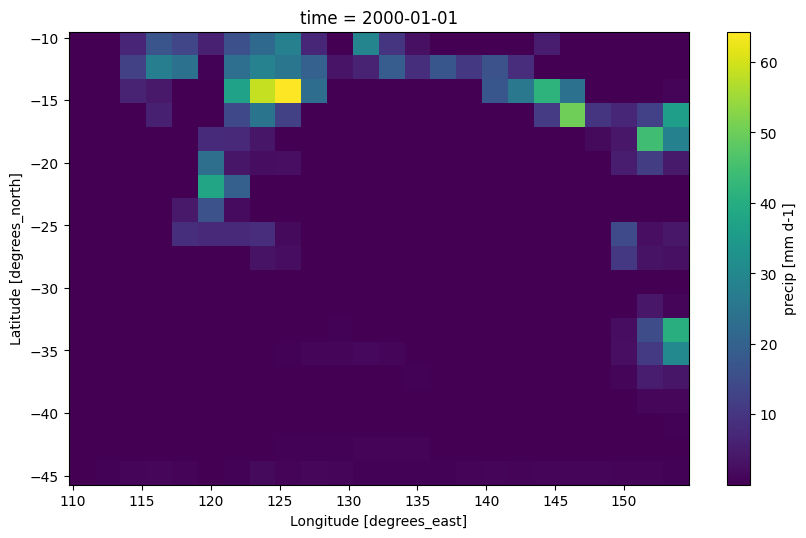

In [3]:
# Creating plot
(
    dataset['precip']
    .sel(time=slice("2000-01-01", "2000-01-01"))
).plot(x='lon', y='lat')


## Calculating the indices
- The list of indices can be found [here](https://xclim.readthedocs.io/en/latest/indicators_api.html)
- The indicator chosen are:
    R10mm / R20mm / CDD / CWD / SDII / R95pTOT / R99pTOT / RX1day / RX5day / PRCPTOT

In [11]:
# Indicators

# # # R10mm
# # r_10 = xc.indices._threshold.wetdays(dataset.precip, thresh='10 mm/day', freq='YS')
# r_10 = xc.indicators.icclim.R10mm(dataset.precip, freq='YS')

# # # R20mm
# # r_20 = xc.indices._threshold.wetdays(dataset.precip, thresh='20 mm/day', freq='YS')
# r_20 = xc.indicators.icclim.R20mm(dataset.precip, freq='YS')

# # # CDD
# # cdd = xc.indices._threshold.maximum_consecutive_dry_days(dataset.precip, thresh='1 mm/day', freq='YS')
# cdd = xc.indicators.cf.cdd(dataset.precip, freq='YS')
    
# # # CWD
# # cwd = xc.indices._threshold.maximum_consecutive_wet_days(dataset.precip, thresh='1 mm/day', freq='YS')
# cwd = xc.indicators.cf.cwd(dataset.precip, freq='YS')

# # # SDII
# # sdii = out = xc.indices._threshold.daily_pr_intensity(dataset.precip, thresh='1 mm/day', freq='YS')
# sdii = xc.indicators.atmos.daily_pr_intensity(dataset.precip, freq='YS')

# R95pTOT
# r95p = xc.indices._multivariate.days_over_precip_thresh(dataset.precip, thresh='1 mm/day', freq='YS', per='1')
# r95p = xc.indicators.icclim.R95pTOT(dataset.precip, freq='YS')

# # R99pTOT

# # RX1day
rx1 = xc.indicators.atmos.max_1day_precipitation_amount(dataset.precip, freq='YS')

# # RX5day
# rx5 = xc.indicators.icclim.RX5day(dataset.precip, freq='YS')

# # PRCPTOT
prcp_tot = xc.indicators.atmos.precip_accumulation(dataset.precip, freq='YS')


# # We have created an xarray data-array - We can insert this into an output xr.Dataset object with a copy of the original dataset global attrs
dsOut = xr.Dataset(attrs=dataset.attrs)

# # Add our climate index as a data variable to the dataset
# dsOut['r_10'] = r_10
# dsOut['r_20'] = r_20
# dsOut['cdd'] = cdd
# dsOut['cwd'] = cwd
# dsOut['sdii'] = sdii
dsOut['rx1'] = rx1
# dsOut['rx5'] = rx5
dsOut['prcp_tot'] = prcp_tot


dsOut

/home/lfpv/.local/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable does not have a `cell_methods` attribute.
  check_valid(
/home/lfpv/.local/lib/python3.8/site-packages/xclim/core/cfchecks.py:44: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(var, "standard_name", data["standard_name"])
/home/lfpv/.local/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable does not have a `cell_methods` attribute.
  check_valid(
/home/lfpv/.local/lib/python3.8/site-packages/xclim/core/cfchecks.py:44: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(var, "standard_name", data["standard_name"])


<xarray.Dataset>
Dimensions:   (lat: 19, lon: 24, time: 20)
Coordinates:
  * time      (time) datetime64[ns] 1991-01-01 1992-01-01 ... 2010-01-01
  * lon       (lon) float32 110.6 112.5 114.4 116.2 ... 148.1 150.0 151.9 153.8
  * lat       (lat) float32 -10.48 -12.38 -14.29 -16.19 ... -40.95 -42.86 -44.76
Data variables:
    rx1       (time, lat, lon) float32 90.28 51.98 50.57 ... 28.46 35.68 44.88
    prcp_tot  (time, lat, lon) float32 658.7 646.6 525.6 ... 928.6 1.034e+03
Attributes:
    history:  Thu Jun 17 12:22:44 2021: ncatted -O -a units,precip,m,c,mm d-1...
    NCO:      netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net, C...

***

## Bland-Altman
 Using pyCompareto generate Bland-Altman plots

In [12]:
# Reading Climpact outputs
# fileNames_lst = ['cddcold18_ANN_climpact_sample_run_1991-2010.nc', 'csdi5_ANN_climpact_sample_run_1991-2010.nc', 
#                  'csdi_ANN_climpact_sample_run_1991-2010.nc', 'cwd_ANN_climpact_sample_run_1991-2010.nc', 
#                  'dtr_ANN_climpact_sample_run_1991-2010.nc', 'dtr_MON_climpact_sample_run_1991-2010.nc', 
#                  'fd_ANN_climpact_sample_run_1991-2010.nc', 'fd_MON_climpact_sample_run_1991-2010.nc', 
#                  'gddgrow10_ANN_climpact_sample_run_1991-2010.nc', 'gsl_ANN_climpact_sample_run_1991-2010.nc', 
#                  'hddheat18_ANN_climpact_sample_run_1991-2010.nc', 'hw_ANN_climpact_sample_run_1991-2010.nc', 
#                  'id_ANN_climpact_sample_run_1991-2010.nc', 'id_MON_climpact_sample_run_1991-2010.nc', 
#                  'prcptot_ANN_climpact_sample_run_1991-2010.nc', 'prcptot_MON_climpact_sample_run_1991-2010.nc', 
#                  'r10mm_ANN_climpact_sample_run_1991-2010.nc', 'r10mm_MON_climpact_sample_run_1991-2010.nc', 
#                  'r20mm_ANN_climpact_sample_run_1991-2010.nc', 'r20mm_MON_climpact_sample_run_1991-2010.nc', 
#                  'r30mm_ANN_climpact_sample_run_1991-2010.nc', 'r30mm_MON_climpact_sample_run_1991-2010.nc', 
#                  'r95p_ANN_climpact_sample_run_1991-2010.nc', 'r95ptot_ANN_climpact_sample_run_1991-2010.nc', 
#                  'r99p_ANN_climpact_sample_run_1991-2010.nc', 'r99ptot_ANN_climpact_sample_run_1991-2010.nc', 
#                  'rx1day_ANN_climpact_sample_run_1991-2010.nc', 'rx1day_MON_climpact_sample_run_1991-2010.nc', 
#                  'rx5day_ANN_climpact_sample_run_1991-2010.nc', 'rx5day_MON_climpact_sample_run_1991-2010.nc', 
#                  'rx7day_ANN_climpact_sample_run_1991-2010.nc', 'rx7day_MON_climpact_sample_run_1991-2010.nc', 
#                  'sdii_ANN_climpact_sample_run_1991-2010.nc']
climpact = xr.load_dataset(input_folder / 'climpact_R_outputs_exampleData/prcptot_ANN_climpact_sample_run_1991-2010.nc')
climpact

<xarray.Dataset>
Dimensions:    (lat: 19, lon: 24, nb2: 2, time: 20)
Coordinates:
  * time       (time) datetime64[ns] 1991-07-02 ... 2010-07-02
  * lon        (lon) float64 110.6 112.5 114.4 116.2 ... 148.1 150.0 151.9 153.8
  * lat        (lat) float64 -10.48 -12.38 -14.29 ... -40.95 -42.86 -44.76
Dimensions without coordinates: nb2
Data variables:
    time_bnds  (time, nb2) datetime64[ns] 1991-01-01 1991-12-31 ... 2010-12-31
    prcptot    (time, lat, lon) float32 644.7 637.1 512.1 ... 900.3 1.004e+03
Attributes:
    history:                      Fri Feb 26 10:25:00 2016: ncatted -O -a uni...
    index_calculation_frequency:  yr
    base_period:                  2001-2001
    author_institution:           Newcastle University
    author_institution_id:        NU
    file_created:                 2021-06-18T10:38:25Z
    file_created_by_userid:       lfpv
    R_version:                    4.1.0
    climdex.pcic_version:         1.1.11
    Climpact_version:             3.0.5
    Climpact_github:              https://github.com/ARCCSS-extremes/climpact

- Checking the difference between measurements

In [13]:
# Creating numpy array ready for comparison
sdii_xs = dsOut['prcp_tot'].sel(time='2010-01-01 00:00:00').values
sdii_cl = climpact['prcptot'].sel(time='2010-07-02 00:00:00').values

# flatten value array to 1D numpy array
sdii_cl_final = sdii_cl.flatten()
sdii_xs_final = sdii_xs.flatten()

# # The lines below are need when working with days outputs in climpact
# sdii_cl_final = (sdii_cl / np.timedelta64(1, 'D')).astype(int).flatten() # this uses timedelta to read value as a day before flatten the array
# sdii_xs_final = sdii_xs.flatten()

In [14]:
# differences between measurements
difference = sdii_xs_final - sdii_cl_final
difference
print('This is the mean of the difference: {}'.format(np.mean(difference)))

This is the mean of the difference: 16.36414909362793


- Checking Bland-Altman

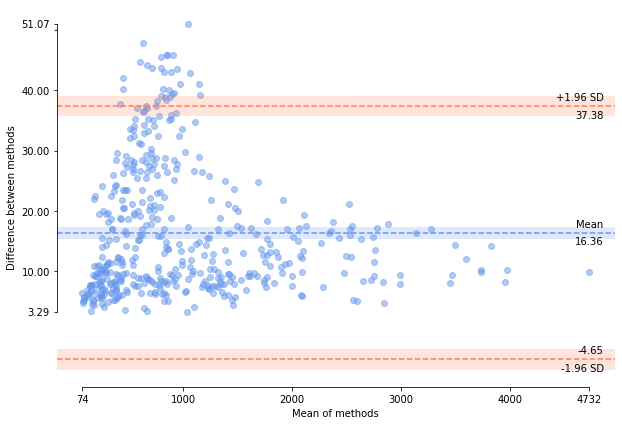

In [15]:
pyCompare.blandAltman(sdii_xs_final, sdii_cl_final)
# pyCompare.blandAltman(sdii_xs_final, sdii_cl_final, percentage=True, 
#                       title='Differences as percentage',
#                       )

# print(sdii_cl_final)
# print(sdii_xs_final)

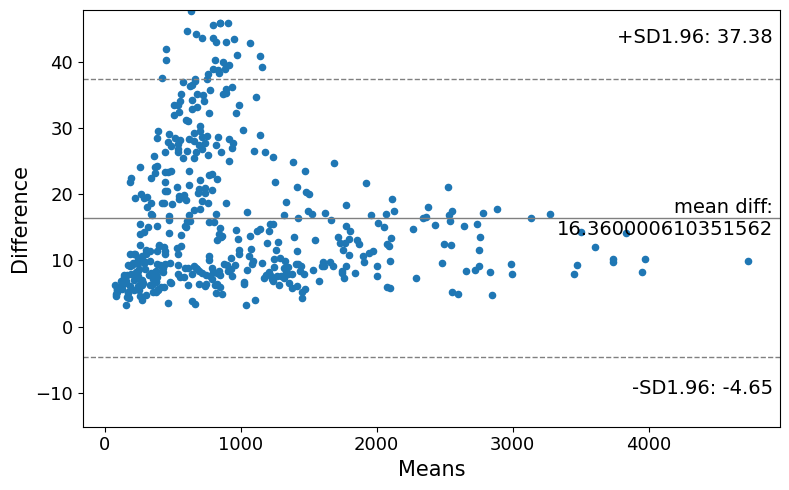

In [27]:
#create Bland-Altman plot using statsmodels            
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(sdii_xs_final, sdii_cl_final, ax = ax)

#display Bland-Altman plot
plt.show()

## Testing for Normality in the Data

Statistics 140.5757367115745 p-value 2.981031933633433e-31
The null hypothesis can be rejected
p = 3.73855e-15
The null hypothesis can be rejected


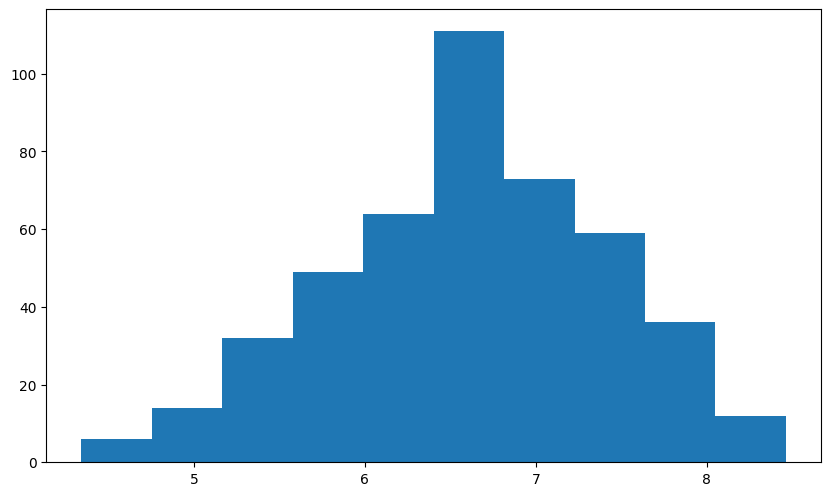

In [25]:
# Check for normal distribution
# sdii_cl_final.sort()
# hmean = np.mean(sdii_cl_final)
# hstd = np.std(sdii_cl_final)
# pdf = stats.norm.pdf(sdii_cl_final, hmean, hstd)
# plt.plot(sdii_cl_final, pdf)

k2, p = stats.normaltest(sdii_cl_final)
alpha = 0.05
print ("Statistics", k2, "p-value", p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
    
# modules
from numpy import exp
from scipy.stats import boxcox

# Check for normal distribution
difference = sdii_xs_final - sdii_cl_final

k2, p = stats.normaltest(difference)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

# n, bins, patches = plt.hist(sdii_xs_final , 50)
# mu = np.mean(sdii_xs_final )
# sigma = np.std(sdii_xs_final )
# plt.plot(bins, mlab.normpdf(bins, mu, sigma))

# transform to be exponential
# data = exp(sdii_xs_final)
# power transform
data = boxcox(sdii_xs_final, 0)
# histogram
plt.hist(data)
plt.show()

In [ ]:
# fit lognormal distribution
sdii_cl_final.sort()
shape, loc, scale = stats.lognorm.fit(sdii_cl_final, loc=0)
pdf_lognorm = stats.lognorm.pdf(sdii_cl_final, shape, loc, scale)

# fit normal distribution
mean, std = stats.norm.fit(sdii_cl_final, loc=0)
pdf_norm = stats.norm.pdf(sdii_cl_final, mean, std)

# fit weibull distribution
shape, loc, scale = stats.weibull_min.fit(sdii_cl_final, loc=0)
pdf_weibull_min = stats.weibull_min.pdf(sdii_cl_final, shape, loc, scale)


# visualize

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(sdii_cl_final, bins='auto', density=True)
ax.plot(sdii_cl_final, pdf_lognorm, label='lognorm')
ax.plot(sdii_cl_final, pdf_norm, label='normal')
ax.plot(sdii_cl_final, pdf_weibull_min, label='Weibull_Min')
ax.set_xlabel('X values')
ax.set_ylabel('probability')
ax.legend();

### Transforming data
- Log transformation

In [ ]:
# fit lognormal 
sdii_cl_final.sort()
shape, loc, scale = stats.lognorm.fit(sdii_cl_final, loc=0)
pdf_lognorm = stats.lognorm.pdf(sdii_cl_final, shape, loc, scale)

# visualize

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.hist(sdii_cl_final, bins='auto', density=True)
ax1.plot(sdii_cl_final, pdf_lognorm)
ax1.set_ylabel('probability')
ax1.set_title('Linear Scale')

ax2.hist(sdii_cl_final, bins='auto', density=True)
ax2.plot(sdii_cl_final, pdf_lognorm)
ax2.set_xscale('log')
ax2.set_title('Log Scale');

- Box-Cox Transformation

In [ ]:
# transform to be exponential
data = exp(sdii_xs_final)
# Box-Cox transformation
sdii_cl_final_trans, lmbda = stats.boxcox(data)

print('Best lambda parameter = %s' % round(lmbda, 3))

fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.boxcox_normplot(sdii_cl_final, -20, 20, plot=ax)
ax.axvline(lmbda, color='r');

In [ ]:
# fit Gaussian distribution

sdii_cl_final_trans.sort()
mean, std = stats.norm.fit(sdii_cl_final_trans, loc=0)
pdf_norm = stats.norm.pdf(sdii_cl_final_trans, mean, std)

# visual inspection

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(sdii_cl_final_trans, bins='auto', density=True)
ax.plot(sdii_cl_final_trans, pdf_norm, label='Fitted normal distribution')
ax.set_xlabel('Call Duration (minutes)')
ax.set_ylabel('Transformed Probability')
ax.set_title('Box-Cox Transformed Distribution of Phone Call Duration')
ax.legend();

- QQ Plots

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

prob = stats.probplot(data, dist=stats.norm, plot=ax1)
prob = stats.probplot(sdii_cl_final_trans, dist=stats.norm, plot=ax2)

ax1.set_title('Original Data')
ax1.set_ylabel('Call Duration (minutes)')
ax2.set_title('Transforamed Data, λ = %s' % -0.322);
ax2.set_ylabel('');

- Normality Test with Hypothesis Testing

In [ ]:
k2, p = stats.normaltest(sdii_cl_final_trans)
print('\nChi-squared statistic = %.3f, p = %.3f' % (k2, p))

alpha = 0.05
if p > alpha:
    print('\nThe transformed data is Gaussian (fails to reject the null hypothesis)')
else:
    print('\nThe transformed data does not look Gaussian (reject the null hypothesis)')